In [1]:
import sys
sys.path.append('../')
from functions import *
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### データ読込

In [2]:
task, target = 'consistent', 'ImpressionsSum'
in_dir = f'../data/two_years_each/val/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

../functions.py:28: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  return m[x.name.weekday_name]
../functions.py:24: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  return 1 if x.name.weekday_name in ['Saturday', 'Sunday'] else 0


### 目的変数の分布

[]

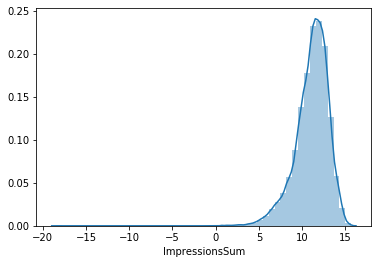

In [3]:
sns.distplot(np.log(df_train_Y[target] + 0.00000001))
plt.plot()

### データ構造転換

In [4]:
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

/Users/dushu/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dushu/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


### パラメータのベイズ最適化

In [5]:
#params = optimize()
#params

### xgboost のバリデーションモデルを作成
- 最適化されたパラメータでモデルを作成

In [6]:
params = {
    'alpha': 6.647423045068218e-05,
    'colsample_bytree': 0.7000000000000001,
    'eta': 0.35000000000000003,
    'gamma': 9.929595921823672e-08,
    'lambda': 7.031458011869039,
    'max_depth': 5,
    'min_child_weight': 0.7360501376864138,
    'n_estimators': 101.0,
    'subsample': 0.75
}

model, evals_result = train2(d_train_sales, d_val_sales, params)
best_iter = model.best_iteration

[0]	train-rmse:7.03908	eval-rmse:7.2143
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[1]	train-rmse:4.61961	eval-rmse:4.70778
[2]	train-rmse:3.06473	eval-rmse:3.07238
[3]	train-rmse:2.07873	eval-rmse:2.02535
[4]	train-rmse:1.47051	eval-rmse:1.34919
[5]	train-rmse:1.11494	eval-rmse:0.927708
[6]	train-rmse:0.916452	eval-rmse:0.672824
[7]	train-rmse:0.809611	eval-rmse:0.537012
[8]	train-rmse:0.749369	eval-rmse:0.465734
[9]	train-rmse:0.712966	eval-rmse:0.437302
[10]	train-rmse:0.693734	eval-rmse:0.426784
[11]	train-rmse:0.683038	eval-rmse:0.41833
[12]	train-rmse:0.675417	eval-rmse:0.418331
[13]	train-rmse:0.669182	eval-rmse:0.414775
[14]	train-rmse:0.661512	eval-rmse:0.414388
[15]	train-rmse:0.652901	eval-rmse:0.414156
[16]	train-rmse:0.64856	eval-rmse:0.411676
[17]	train-rmse:0.642269	eval-rmse:0.411915
[18]	train-rmse:0.636451	eval-rmse:0.406335
[19]	train-rmse:0.631588	eval-rmse:0.40364
[2

### 損失関数の曲線

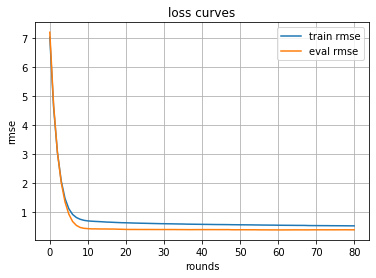

In [7]:
def draw_loss(evals_result):
    train_metric = evals_result['train']['rmse']
    plt.plot(train_metric, label='train rmse')
    eval_metric = evals_result['eval']['rmse']
    plt.plot(eval_metric, label='eval rmse')
    plt.grid()
    plt.legend()
    plt.title('loss curves')
    plt.xlabel('rounds')
    plt.ylabel('rmse')
    plt.show()
draw_loss(evals_result)

### バリデーション結果と実測値

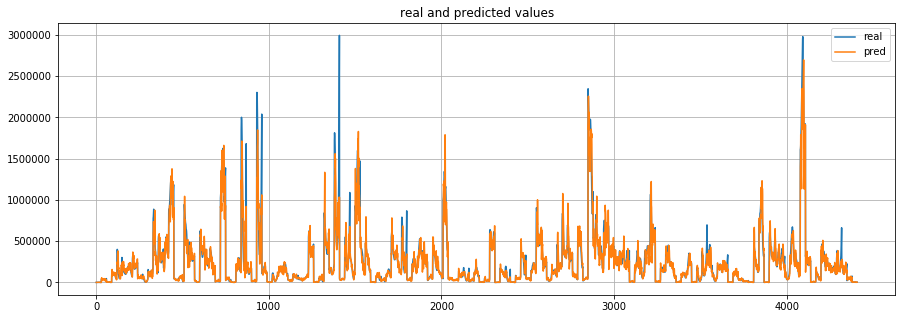

In [8]:
def draw_preds(model, d_val, df_val_Y, target, pred_type='validation'):
    d_pred_log = model.predict(d_val)
    d_pred = np.exp(d_pred_log)
    
    df_val_Y[f'{target}_pred'] = d_pred
    df_val_Y.to_excel(f'./output/{target}_{pred_type}.xlsx')

    plt.figure(figsize=(15,5))
    plt.plot(df_val_Y[target].values, label='real')
    plt.plot(d_pred, label='pred')
    plt.title('real and predicted values')
    plt.legend()
    plt.grid()
    plt.show()
draw_preds(model, d_val, df_val_Y, target)

### 特徴量の寄与度

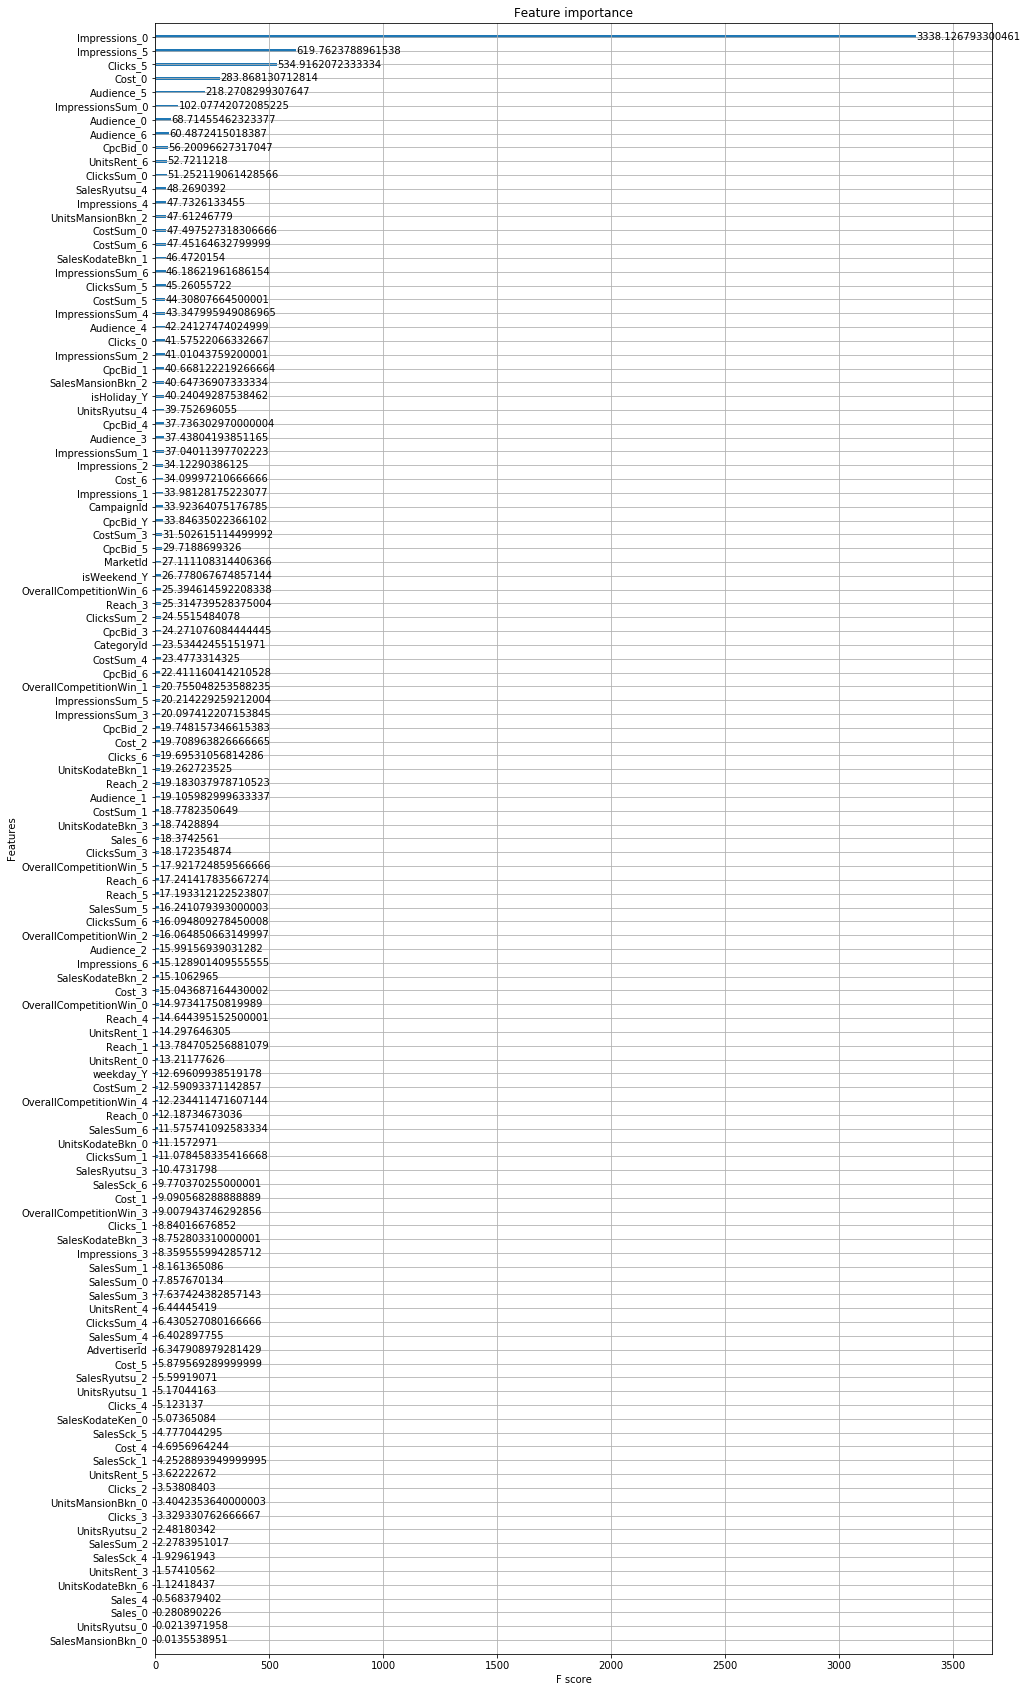

In [9]:
def draw_feat_importances(model):
    _, ax = plt.subplots(figsize=(15,30))
    xgb.plot_importance(model, ax=ax, importance_type='gain')
    plt.show()
draw_feat_importances(model)

In [10]:
fi = get_feat_importances(model)

### 最適化されたパラメータで予測モデルを作成
- テスト１：~2019/12/4を学習して2019/12/5~2019/12/11一週間を予測

In [11]:
# データの読込と前処理
in_dir = f'../data/two_years_each/test_1/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

# xgboost のデータ構造に転換
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

In [12]:
# バリデーションにおいて最適化されたパラメータで学習
model, evals_result = train2(d_train_sales, d_val_sales, params, best_iter=best_iter, esr=None)

[0]	train-rmse:7.04525	eval-rmse:7.45467
[1]	train-rmse:4.62477	eval-rmse:4.89142
[2]	train-rmse:3.06499	eval-rmse:3.24315
[3]	train-rmse:2.07556	eval-rmse:2.18317
[4]	train-rmse:1.46657	eval-rmse:1.50771
[5]	train-rmse:1.10777	eval-rmse:1.07707
[6]	train-rmse:0.90896	eval-rmse:0.802367
[7]	train-rmse:0.810352	eval-rmse:0.643525
[8]	train-rmse:0.755594	eval-rmse:0.558498
[9]	train-rmse:0.727913	eval-rmse:0.50371
[10]	train-rmse:0.706333	eval-rmse:0.477632
[11]	train-rmse:0.688371	eval-rmse:0.459584
[12]	train-rmse:0.677282	eval-rmse:0.451095
[13]	train-rmse:0.66943	eval-rmse:0.443437
[14]	train-rmse:0.660505	eval-rmse:0.440815
[15]	train-rmse:0.650818	eval-rmse:0.436944
[16]	train-rmse:0.647398	eval-rmse:0.433901
[17]	train-rmse:0.641305	eval-rmse:0.432622
[18]	train-rmse:0.635659	eval-rmse:0.432329
[19]	train-rmse:0.629557	eval-rmse:0.435208
[20]	train-rmse:0.625667	eval-rmse:0.42968
[21]	train-rmse:0.623451	eval-rmse:0.427606
[22]	train-rmse:0.618834	eval-rmse:0.426215
[23]	train-rms

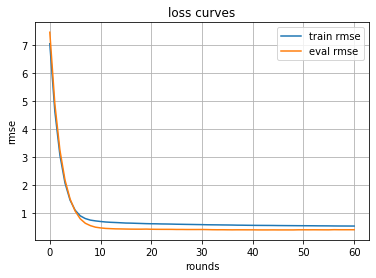

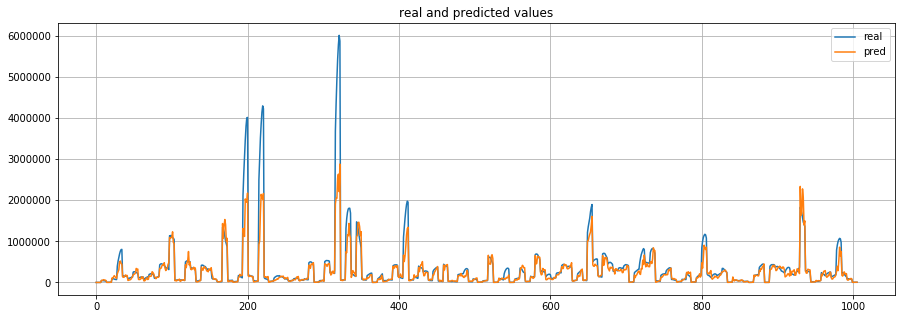

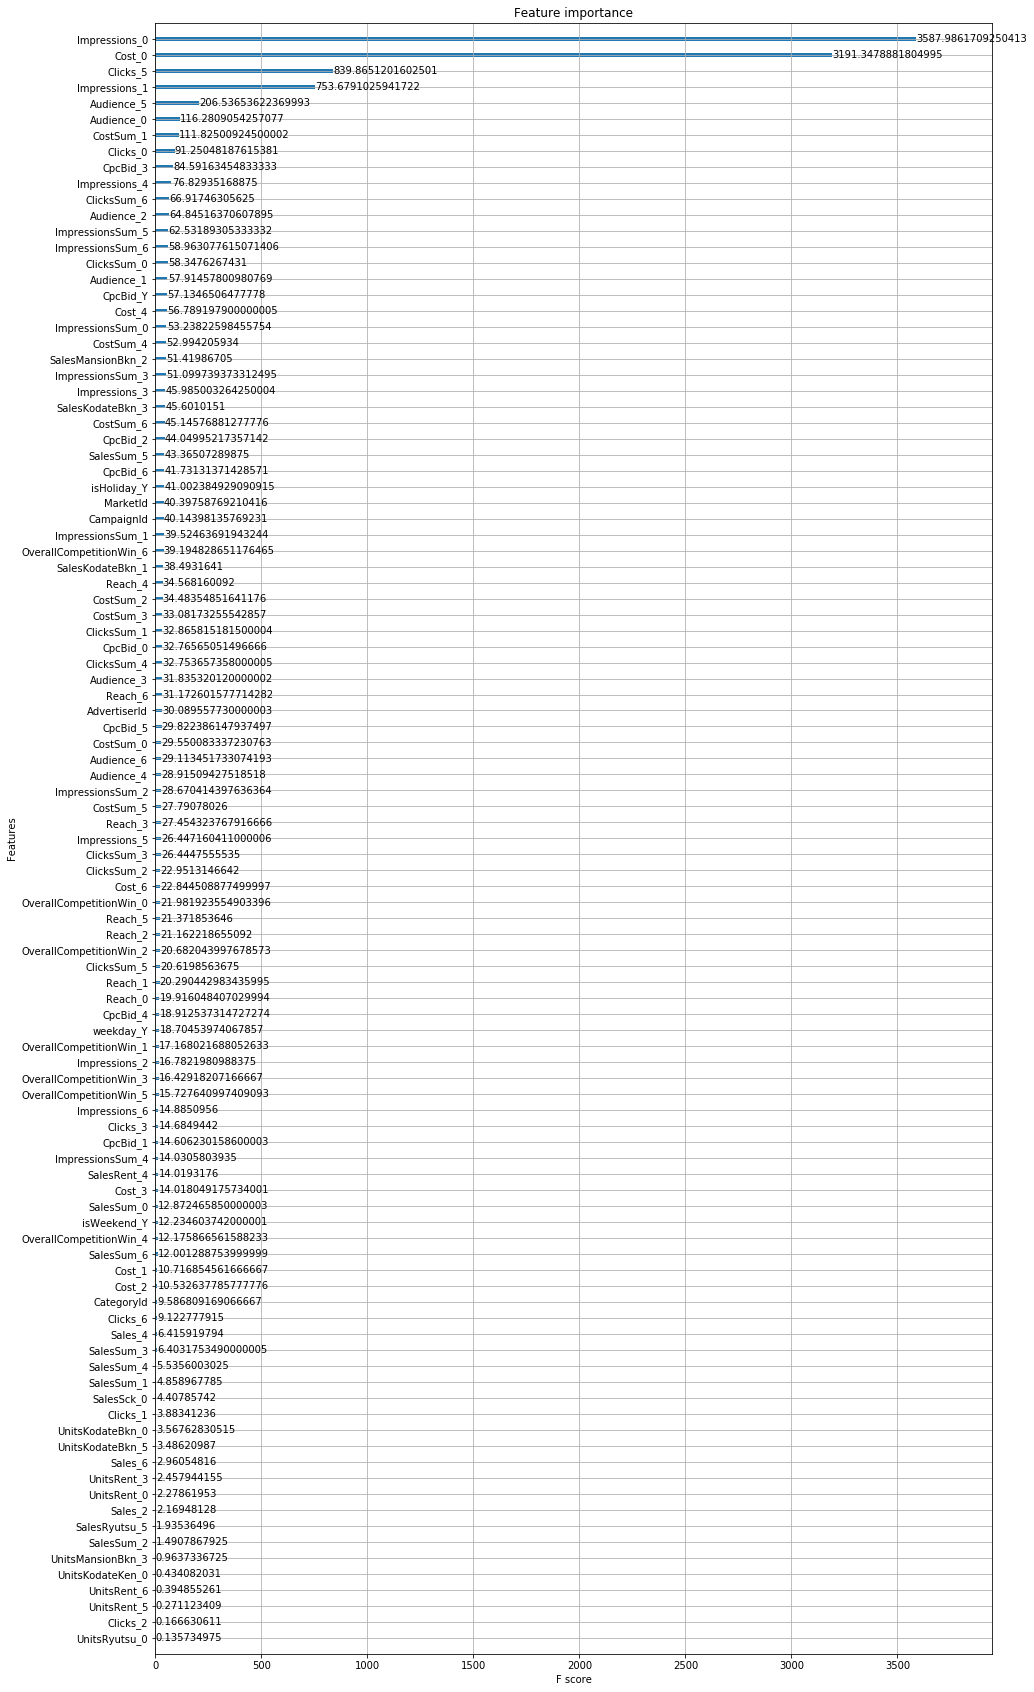

In [13]:
draw_loss(evals_result)
draw_preds(model, d_val, df_val_Y, target, 'test1')
draw_feat_importances(model)

- テスト２：~2019-12-11を学習して2019-12-12~2019-12-18一週間を予測

In [14]:
# データの読込と前処理
in_dir = f'../data/two_years_each/test_2/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

# xgboost のデータ構造に転換
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

In [15]:
# バリデーションにおいて最適化されたパラメータで学習
model, evals_result = train2(d_train_sales, d_val_sales, params, best_iter=best_iter, esr=None)

[0]	train-rmse:7.04983	eval-rmse:7.15226
[1]	train-rmse:4.62727	eval-rmse:4.5747
[2]	train-rmse:3.07114	eval-rmse:2.9304
[3]	train-rmse:2.08252	eval-rmse:1.86125
[4]	train-rmse:1.47039	eval-rmse:1.26098
[5]	train-rmse:1.11135	eval-rmse:0.876893
[6]	train-rmse:0.912829	eval-rmse:0.677783
[7]	train-rmse:0.804189	eval-rmse:0.571106
[8]	train-rmse:0.744595	eval-rmse:0.535876
[9]	train-rmse:0.709589	eval-rmse:0.533813
[10]	train-rmse:0.692955	eval-rmse:0.535749
[11]	train-rmse:0.680493	eval-rmse:0.539682
[12]	train-rmse:0.672769	eval-rmse:0.54613
[13]	train-rmse:0.662278	eval-rmse:0.547121
[14]	train-rmse:0.655935	eval-rmse:0.572139
[15]	train-rmse:0.647632	eval-rmse:0.574552
[16]	train-rmse:0.641715	eval-rmse:0.57624
[17]	train-rmse:0.637087	eval-rmse:0.576532
[18]	train-rmse:0.633707	eval-rmse:0.577048
[19]	train-rmse:0.629444	eval-rmse:0.578522
[20]	train-rmse:0.624793	eval-rmse:0.575626
[21]	train-rmse:0.621225	eval-rmse:0.575924
[22]	train-rmse:0.616313	eval-rmse:0.574324
[23]	train-rm

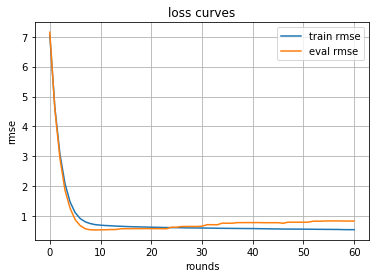

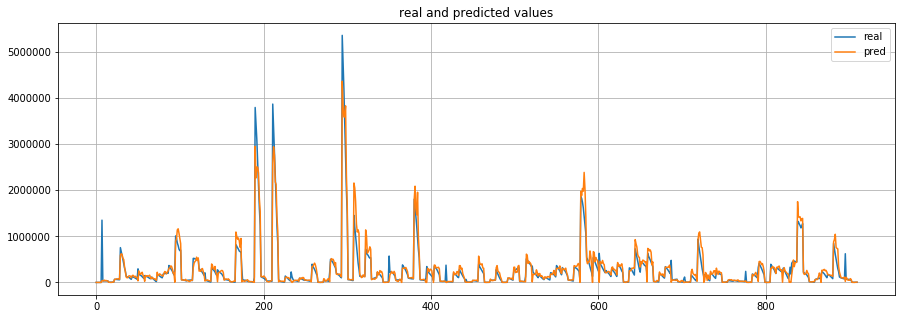

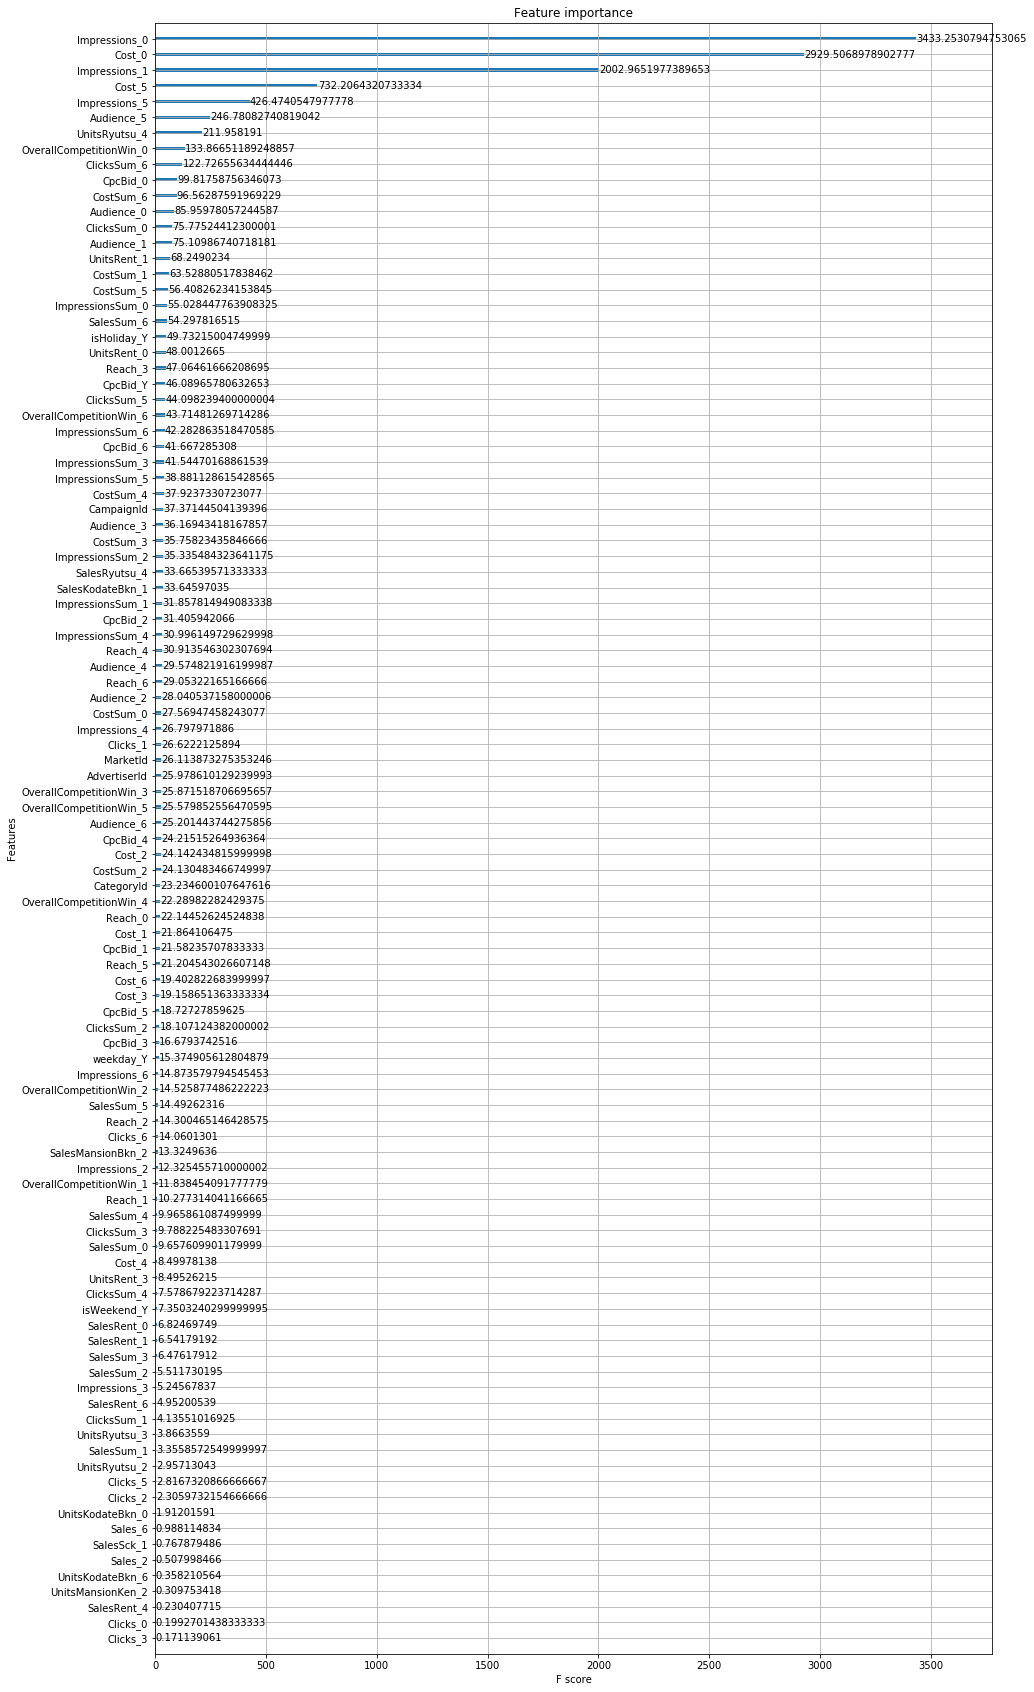

In [16]:
draw_loss(evals_result)
draw_preds(model, d_val, df_val_Y, target, 'test2')
draw_feat_importances(model)